Datasets

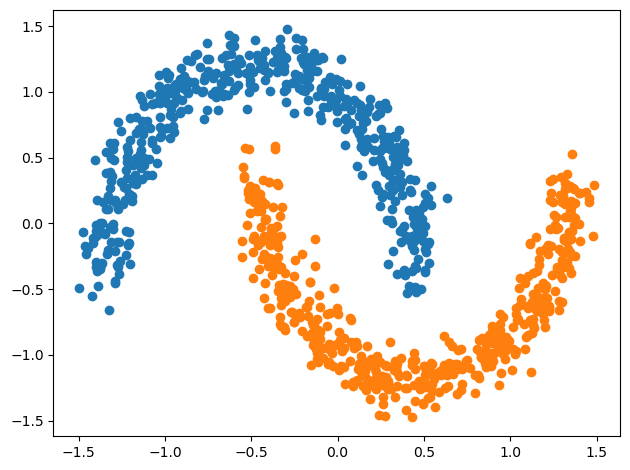

In [6]:
# construct the dataset
def load_synthetic_dataset(dataset):
    if dataset == "Swiss":
        from sklearn.datasets import make_swiss_roll
        DATA = make_swiss_roll(n_samples=int(n/2), noise=0.35)[0]

        trn_X = torch.tensor(DATA)[:,0].to(device)
        trn_X = torch.stack((trn_X, torch.tensor(DATA)[:,2].to(device)), dim=1)
        trn_X = torch.cat((trn_X, -trn_X), dim=0).float()
        trn_X = trn_X / 10
        trn_Y = torch.ones(int(n/2)).to(device)
        trn_Y = torch.cat((trn_Y, 0*trn_Y), dim=0).float().view(-1,1)
        test_X = trn_X
        test_Y = trn_Y

    elif dataset == "XOR" :
        trn_X = torch.tensor([0.7,0.7]) + torch.randn(int(n/4), 2) * 0.15 # noise
        trn_X = torch.cat((trn_X, -trn_X)).to(device)
        temp_X = torch.cat((trn_X[:,0].unsqueeze(dim=1), -trn_X[:,1].unsqueeze(dim=1)), dim=1)
        trn_X = torch.cat((trn_X, temp_X)).to(device)

        trn_Y = torch.ones(int(n/2)).to(device)
        trn_Y = torch.cat((trn_Y, 0*trn_Y), dim=0).float().view(-1,1)

    elif dataset == "Two circles" :
        trn_X = torch.randn(int(n/2), 2).to(device)
        trn_X = trn_X / trn_X.norm(dim=1).unsqueeze(dim=1) # radius 1
        trn_X = torch.cat((trn_X*0.5, trn_X*1.1))
        trn_X = trn_X + 0.05 * torch.randn_like(trn_X)

        trn_Y = torch.ones(int(n/2)).to(device)
        trn_Y = torch.cat((trn_Y, 0*trn_Y), dim=0).float().view(-1,1)

    elif dataset == "Two moons" :
        from sklearn.datasets import make_moons
        DATA = make_moons(n_samples=int(n), shuffle=False, noise=0.08, random_state=None)
        trn_X = torch.tensor(DATA[0]).to(device).float()
        trn_X = trn_X - trn_X.mean(dim=0).unsqueeze(dim=0)
        trn_X[:,1] *= 1.6 # rescaling y axis
        trn_X[:,0] *= 0.9 # rescaling x axis
        trn_X = trn_X.clamp(min=-1.55, max=1.55)

        trn_Y = torch.tensor(DATA[1]).to(device).float().view(-1,1)
        
    elif dataset == "S curve" :
        from sklearn.datasets import make_s_curve
        DATA = make_s_curve(n_samples=int(n), noise=0.05)
        
    else:
        raise ValuError(f"Wrong input for synthetic datasets: {dataset}")
    return trn_X, trn_Y

# device = "cuda:0"
# dataset = "S curve"
# trn_X, trn_Y = load_synthetic_dataset(dataset)
# plt.figure()
# plt.scatter(trn_X[:int(n/2),0].cpu(), trn_X[:int(n/2),1].cpu())
# plt.scatter(trn_X[int(n/2):,0].cpu(), trn_X[int(n/2):,1].cpu())
# plt.show()